# **NYC Property Sales Predictor (PSP) Exploratory Data Analysis**

## **Goal**
For this entire project, I'm going to build a machine learning model that could predict the property sales price for properties in NYC. I'm dividing my project into the following sections:

* **EDA**
* **Data Preparation**
* **Modelling**

## **Project description**
In this document, I'm showing my Exploratory Data Analysis (EDA) on the main dataset about Property Sales in New York City.

I found different datasets that are about real estate and other statistics about New York City. I searched for different datasets that I could combine for my machine learning model.
At the end I found 2 datasets: 
  1.	**New York City property sales** 

  Link: https://www.kaggle.com/new-york-city/nyc-property-sales 
  2.	**New York City census data** 

  Link: https://www.kaggle.com/muonneutrino/new-york-city-census-data 


## **Importing Libraries**

In [2]:
import pandas as pd # Data manipulation
import numpy as np # Scientific computing

import matplotlib.pyplot as plt # Data Visualization
import seaborn as sns # Data Visualization

sns.set(style='darkgrid', context='notebook', palette='deep') # Theme
import matplotlib.style as style
style.use('fivethirtyeight') # Theme
import warnings; warnings.simplefilter('ignore') # Ignore warnings

## **Importing Data**

In [4]:
real_estate = pd.read_csv('data/nyc-rolling-sales.csv', index_col=0)
census = pd.read_csv('data/nyc_census_tracts.csv')

# **Exploratory Data Analysis (EDA)**
The EDA is divided in the following steps:

1.   Basic data exploration
2.   Identification of variables and data types
3.   Missing values
5.   Univariate Analysis
6.   Bivariate Analysis
7.   Correlation matrix
8. Conclusion



## **1. Basic data exploration**
The basic data exploration includes the following pandas methods:
1. `info()` for printing a summary about the columns and data types in the dataframe.
2. `describe()` for showing statistical information about the nummerical values in the dataframe.
3. `head()` for showing the first 5 rows in the dataframe.

In [5]:
real_estate.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84548 entries, 4 to 8413
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   BOROUGH                         84548 non-null  int64 
 1   NEIGHBORHOOD                    84548 non-null  object
 2   BUILDING CLASS CATEGORY         84548 non-null  object
 3   TAX CLASS AT PRESENT            84548 non-null  object
 4   BLOCK                           84548 non-null  int64 
 5   LOT                             84548 non-null  int64 
 6   EASE-MENT                       84548 non-null  object
 7   BUILDING CLASS AT PRESENT       84548 non-null  object
 8   ADDRESS                         84548 non-null  object
 9   APARTMENT NUMBER                84548 non-null  object
 10  ZIP CODE                        84548 non-null  int64 
 11  RESIDENTIAL UNITS               84548 non-null  int64 
 12  COMMERCIAL UNITS                84548 non-null 

In [6]:
real_estate.describe()

,BOROUGH,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,YEAR BUILT,TAX CLASS AT TIME OF SALE
count,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000
mean,2.998758,4237.218976,376.224015,10731.991614,2.025264,0.193559,2.249184,1789.322976,1.657485
std,1.289790,3568.263407,658.136814,1290.879147,16.721037,8.713183,18.972584,537.344993,0.819341
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,1322.750000,22.000000,10305.000000,0.000000,0.000000,1.000000,1920.000000,1.000000
50%,3.000000,3311.000000,50.000000,11209.000000,1.000000,0.000000,1.000000,1940.000000,2.000000
75%,4.000000,6281.000000,1001.000000,11357.000000,2.000000,0.000000,2.000000,1965.000000,2.000000
max,5.000000,16322.000000,9106.000000,11694.000000,1844.000000,2261.000000,2261.000000,2017.000000,4.000000


In [7]:
real_estate.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


## **2. Identification of variables and data types**
For this part of the EDA I'm identifying the type of variables in the dataset. It is imporant for an EDA to know with what kind of variables you are dealing with.
There are two types of variables:

1. ***Categorical***
2. ***Numerical***

For this step, I'm creating two lists for each dataset where I'm saving the different columns. I'm using list comprehensions because it allows me to write less code and saves me some time. I'm using conditional logic to assign the right columns to the data type list where it belongs. In the end, I'm using formatted strings to display the variables in a string.

In [8]:
# Renaming the boroughs in NYC
real_estate['BOROUGH'][real_estate['BOROUGH'] == 1] = 'Manhattan'
real_estate['BOROUGH'][real_estate['BOROUGH'] == 2] = 'Bronx'
real_estate['BOROUGH'][real_estate['BOROUGH'] == 3] = 'Brooklyn'
real_estate['BOROUGH'][real_estate['BOROUGH'] == 4] = 'Queens'
real_estate['BOROUGH'][real_estate['BOROUGH'] == 5] = 'Staten Island'

In [9]:
# Select categorical columns
categorical_cols_re = [cname for cname in real_estate.columns if
                    real_estate[cname].dtype == "object"]
# Select numerical columns
numerical_cols_re = [cname for cname in real_estate.columns if 
                real_estate[cname].dtype in ['int64', 'float64']]

# Print the columns
print(f'There are {len(categorical_cols_re)} categorical columns in the property sales dataset. \nThe columns are: {categorical_cols_re}. \n')
print(f'There are {len(numerical_cols_re)} numerical columns in the property sales dataset. \nThe columns are: {numerical_cols_re}.')

There are 13 categorical columns in the property sales dataset. 
The columns are: ['BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY', 'TAX CLASS AT PRESENT', 'EASE-MENT', 'BUILDING CLASS AT PRESENT', 'ADDRESS', 'APARTMENT NUMBER', 'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'BUILDING CLASS AT TIME OF SALE', 'SALE PRICE', 'SALE DATE']. 

There are 8 numerical columns in the property sales dataset. 
The columns are: ['BLOCK', 'LOT', 'ZIP CODE', 'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS', 'YEAR BUILT', 'TAX CLASS AT TIME OF SALE'].


## **3. Missing values and data cleaning**
For this step of the project, I'm checking for missing values in the datasets. I noticed when I used the `head()` method that some values where marked with the '-' sign instead of a NaN. I used the `unique()` method to find the unique values in the column and found something interesting. The '-' sign was formatted in the string as ' -  '. 

### **NYC Property sales dataset**

In [10]:
real_estate.isna().sum()

BOROUGH                           0
NEIGHBORHOOD                      0
BUILDING CLASS CATEGORY           0
TAX CLASS AT PRESENT              0
BLOCK                             0
LOT                               0
EASE-MENT                         0
BUILDING CLASS AT PRESENT         0
ADDRESS                           0
APARTMENT NUMBER                  0
ZIP CODE                          0
RESIDENTIAL UNITS                 0
COMMERCIAL UNITS                  0
TOTAL UNITS                       0
LAND SQUARE FEET                  0
GROSS SQUARE FEET                 0
YEAR BUILT                        0
TAX CLASS AT TIME OF SALE         0
BUILDING CLASS AT TIME OF SALE    0
SALE PRICE                        0
SALE DATE                         0
dtype: int64

In [11]:
real_estate['SALE PRICE'].unique()

array(['6625000', ' -  ', '3936272', ..., '408092', '11693337', '69300'],
      dtype=object)

In [12]:
' -  ' in real_estate['SALE PRICE'].unique()

True

In [13]:
# List comprehension to find the columns where that have strings as values and contain ' -  '
cols_with_missing_values = [col for col in real_estate.columns if 
                           real_estate[col].dtype == 'object' if 
                           ' -  ' in real_estate[col].unique()]

In [14]:
print(f'The columns with missing values are: {cols_with_missing_values}.')

The columns with missing values are: ['LAND SQUARE FEET', 'GROSS SQUARE FEET', 'SALE PRICE'].


Because numeric values could not contain any characters, it makes sense that there were not any missing values. With objects, it's another problem. Because some of these columns were objects instead of numeric values. I used the `to_numeric()` function to convert these objects to numeric values and used the `errors='coerce'` argument to replace the wrong values with NaN values. I saved this CSV with NaN values because I can use it later in my project for the data preparation and modelling part of this project.

In [16]:
# Data cleaning
real_estate['LAND SQUARE FEET'] = pd.to_numeric(real_estate['LAND SQUARE FEET'], errors='coerce')
real_estate['GROSS SQUARE FEET'] = pd.to_numeric(real_estate['GROSS SQUARE FEET'], errors='coerce')
real_estate['SALE PRICE'] = pd.to_numeric(real_estate['SALE PRICE'], errors='coerce')

real_estate['SALE DATE'] = pd.to_datetime(real_estate['SALE DATE'], errors='coerce')

#Both TAX CLASS attributes should be categorical
real_estate['TAX CLASS AT TIME OF SALE'] = real_estate['TAX CLASS AT TIME OF SALE'].astype('category')
real_estate['TAX CLASS AT PRESENT'] = real_estate['TAX CLASS AT PRESENT'].astype('category')

real_estate.to_csv('data/nan_nyc_property_sales.csv', index=False)
real_estate.isnull().sum()

BOROUGH                               0
NEIGHBORHOOD                          0
BUILDING CLASS CATEGORY               0
TAX CLASS AT PRESENT                  0
BLOCK                                 0
LOT                                   0
EASE-MENT                             0
BUILDING CLASS AT PRESENT             0
ADDRESS                               0
APARTMENT NUMBER                      0
ZIP CODE                              0
RESIDENTIAL UNITS                     0
COMMERCIAL UNITS                      0
TOTAL UNITS                           0
LAND SQUARE FEET                  26252
GROSS SQUARE FEET                 27612
YEAR BUILT                            0
TAX CLASS AT TIME OF SALE             0
BUILDING CLASS AT TIME OF SALE        0
SALE PRICE                        14561
SALE DATE                             0
dtype: int64

So there are 3 columns with missing values. Before I'm going to decide how to deal with these missing values, I'm going to take a closer look at them. Let's see how many per cent of the values are missing per column.

In [17]:
print(f'The first column LAND SQUARE FEET has {round(26252 / (len(real_estate) / 100),2)}% missing data')
print(f'The second column GROSS SQUARE FEET has {round(27612 / (len(real_estate) / 100),2)}% missing data')
print(f'The third column SALE PRICE has {round(14561 / (len(real_estate) / 100),2)}% missing data')

The first column LAND SQUARE FEET has 31.05% missing data
The second column GROSS SQUARE FEET has 32.66% missing data
The third column SALE PRICE has 17.22% missing data


That's a lot of missing values! I don't think it is a great idea to drop the columns with 31% and 33% missing data. The target variable which is the SALE PRICE has missing values and I have to delete the missing values from this column. The next step for the other columns will be to use imputation to handle these missing values. The reason why I'm using the median instead of the mean is that the median is more robust to outliers.

In [18]:
# Filling up the missing values with the median
real_estate['LAND SQUARE FEET'].fillna((real_estate['LAND SQUARE FEET'].median()), inplace=True)
real_estate['GROSS SQUARE FEET'].fillna((real_estate['GROSS SQUARE FEET'].median()), inplace=True)

real_estate = real_estate[real_estate['SALE PRICE'].notnull()]

In [19]:
# Final check to see if it worked
real_estate.isnull().sum()

BOROUGH                           0
NEIGHBORHOOD                      0
BUILDING CLASS CATEGORY           0
TAX CLASS AT PRESENT              0
BLOCK                             0
LOT                               0
EASE-MENT                         0
BUILDING CLASS AT PRESENT         0
ADDRESS                           0
APARTMENT NUMBER                  0
ZIP CODE                          0
RESIDENTIAL UNITS                 0
COMMERCIAL UNITS                  0
TOTAL UNITS                       0
LAND SQUARE FEET                  0
GROSS SQUARE FEET                 0
YEAR BUILT                        0
TAX CLASS AT TIME OF SALE         0
BUILDING CLASS AT TIME OF SALE    0
SALE PRICE                        0
SALE DATE                         0
dtype: int64

## **4. Univariate Analysis**
Univariate analysis is the simplest form of analyzing data. “Uni” means “one”, so in other words your data has only one variable. It doesn't deal with causes or relationships (unlike regression ) and it's major purpose is to describe; It takes data, summarizes that data and finds patterns in the data. 

Let's take a look at some of the single variables in the dataset.



#### **Property price distribution in New York City**

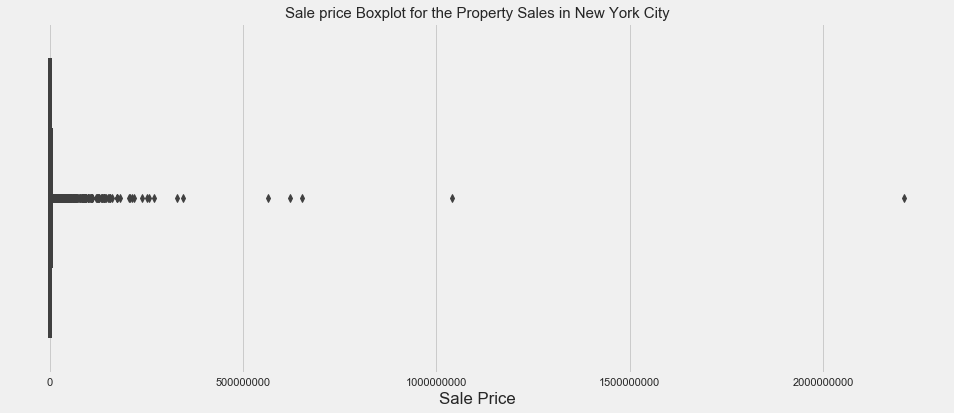

In [20]:
# Figure size and theme
plt.figure(figsize=(15,6))

# Plot the data
sns.boxplot(real_estate['SALE PRICE'])
plt.title('Sale price Boxplot for the Property Sales in New York City',fontsize=15)
plt.ticklabel_format(style='plain', axis='x')
plt.xlabel('Sale Price')
plt.show()

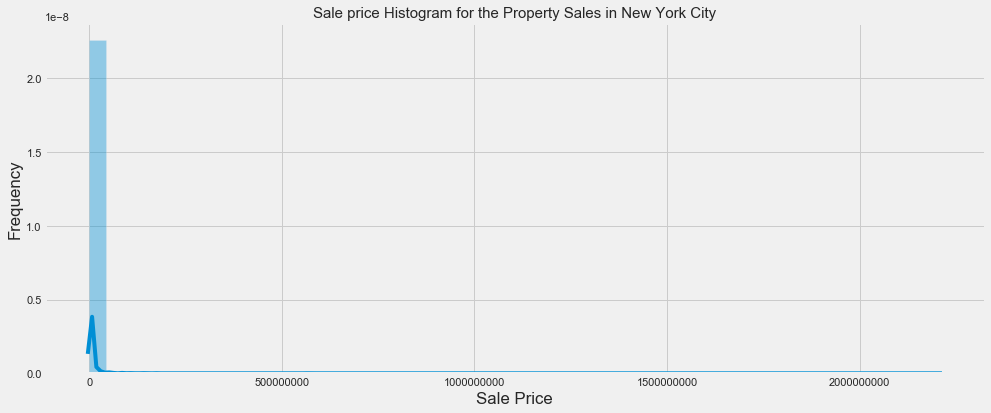

In [21]:
# Figure size and theme
plt.figure(figsize=(15,6))

# Plot the data
sns.distplot(real_estate['SALE PRICE'])
plt.title('Sale price Histogram for the Property Sales in New York City',fontsize=15)
plt.ticklabel_format(style='plain', axis='x')
plt.ylabel('Frequency')
plt.xlabel('Sale Price')
plt.show()

It seems that there are a lot of outliers in this dataset. That is very normal considering that Manhattan has a lot of expensive properties. [Source](https://www.timeout.com/newyork/news/these-are-the-new-most-expensive-neighborhoods-in-nyc-010621) 
For this part, I'm only using houses that are in a price range between 100.000 dollars and 3.000.000. With this filter, I'm filtering out 20% of the real estate properties using conditional logic.


In [22]:
perc = len(real_estate[real_estate['SALE PRICE'] < 100000]) / 845.48 + len(real_estate[real_estate['SALE PRICE'] > 3000000]) / 845.48

In [23]:
print(f'The data set has {round(perc,0)}% less data now.')

The data set has 20.0% less data now.


In [24]:
price_dist = real_estate[(real_estate['SALE PRICE'] >= 100000) & (real_estate['SALE PRICE'] <= 3000000)]

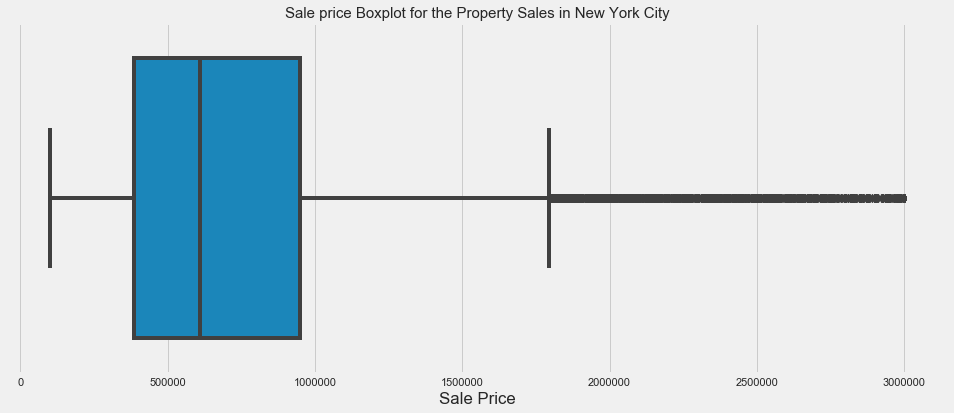

In [25]:
# Figure size and theme
plt.figure(figsize=(15,6))

# Plot the data
sns.boxplot(price_dist['SALE PRICE'])
plt.title('Sale price Boxplot for the Property Sales in New York City',fontsize=15 )
plt.ticklabel_format(style='plain', axis='x')
plt.xlabel('Sale Price')
plt.show()

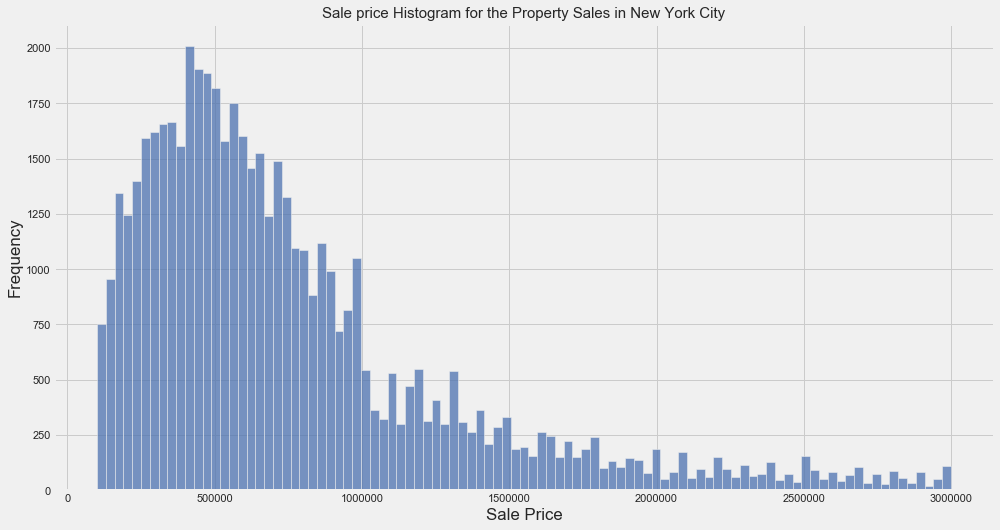

In [26]:
# Figure size and theme
plt.figure(figsize=(15,8))

# Plot the data
sns.histplot(price_dist['SALE PRICE'])
plt.title('Sale price Histogram for the Property Sales in New York City',fontsize=15)
plt.ticklabel_format(style='plain', axis='x')
plt.ylabel('Frequency')
plt.xlabel('Sale Price')
plt.show()

It seems that the Median Sale Price for a property in New York in the price range of 100.000 dollars and 3.000.000 dollar is 610.000 dollar. The histogram shows that most property prices in New York City are around 500.000 dollars.

#### **Boroughs with the most properties in New York City**
It seems that Brooklyn has the most properties of all the boroughs in New York City in this dataset. That is not strange considering that Brooklyn has also the highest population as seen in the census dataset.

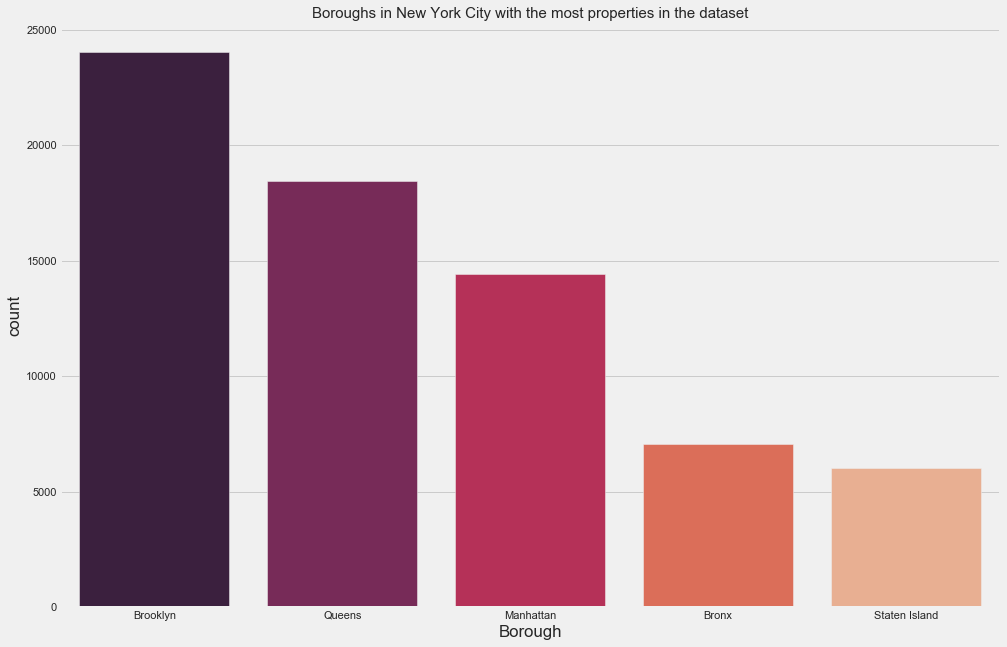

In [27]:
# Figure size and theme
plt.figure(figsize=(15,10))
# Plot the data
sns.countplot(real_estate['BOROUGH'], palette='rocket', orient='v', order = real_estate['BOROUGH'].value_counts().index)

plt.title('Boroughs in New York City with the most properties in the dataset',fontsize=15)
plt.xlabel('Borough')
plt.show()

In [28]:
 pop = census.groupby('Borough').sum()
 pop.reset_index(inplace=True)

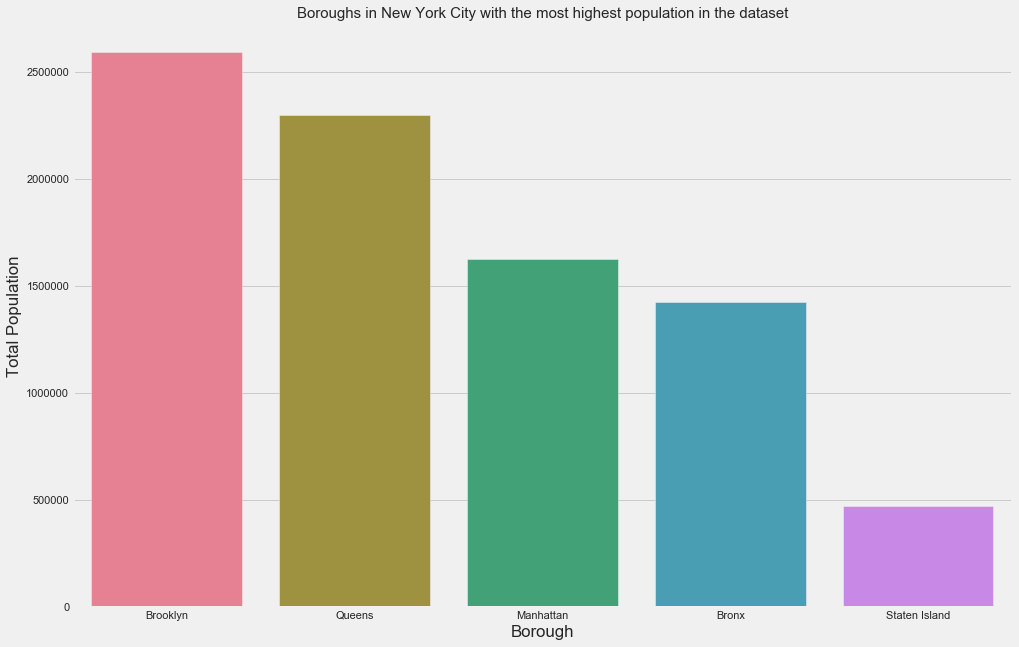

In [29]:
# Figure size and theme
plt.figure(figsize=(15,10))
# Plot the data
sns.barplot(pop['Borough'], pop['TotalPop'], palette='husl', orient='v', order = real_estate['BOROUGH'].value_counts().index)

plt.title('Boroughs in New York City with the most highest population in the dataset',fontsize=15)
plt.ticklabel_format(style='plain', axis='y')
plt.xlabel('Borough')
plt.ylabel('Total Population')
plt.show()

#### **Built Year distribution**

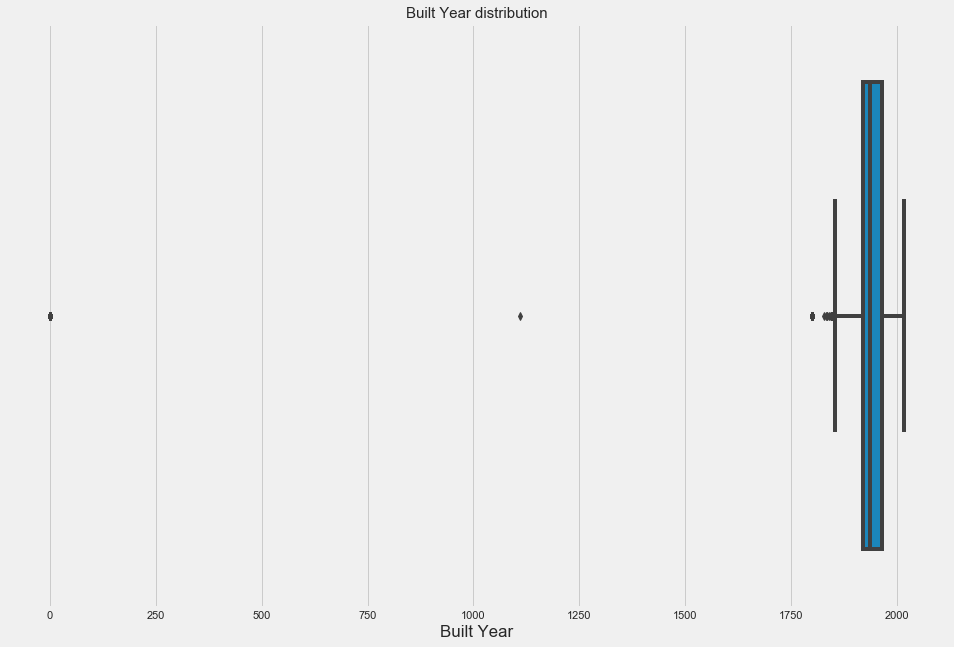

In [30]:
# Figure size and theme
plt.figure(figsize=(15,10))

# Plot the data
sns.boxplot(real_estate['YEAR BUILT'])

plt.title('Built Year distribution',fontsize=15)
plt.xlabel('Built Year')
plt.show()

Also here are a lot of outliers. I found on the internet that the oldest building in the city is from [1652](https://ny.curbed.com/maps/nyc-oldest-buildings-houses-map). In this case I'm removing every data point before that year. It seems that the median builty year for a New York City property is 1942 and that there are a few outliers that were built before 1860.

In [31]:
year_dist = real_estate[real_estate['YEAR BUILT']>= 1652]

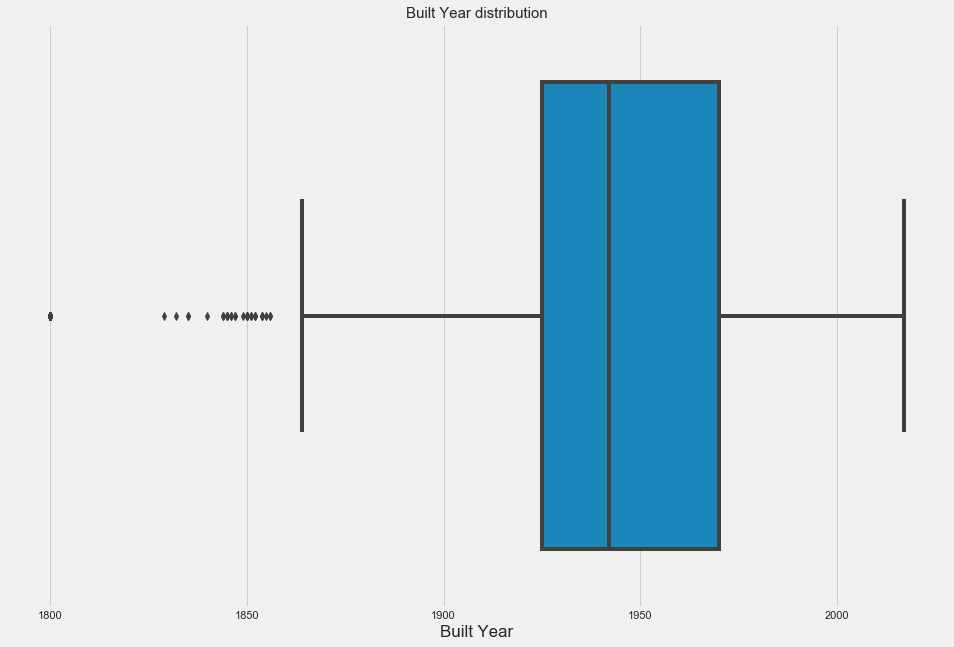

In [32]:
# Figure size and theme
plt.figure(figsize=(15,10))

# Plot the data
sns.boxplot(year_dist['YEAR BUILT'])

plt.title('Built Year distribution',fontsize=15)
plt.xlabel('Built Year')
plt.show()

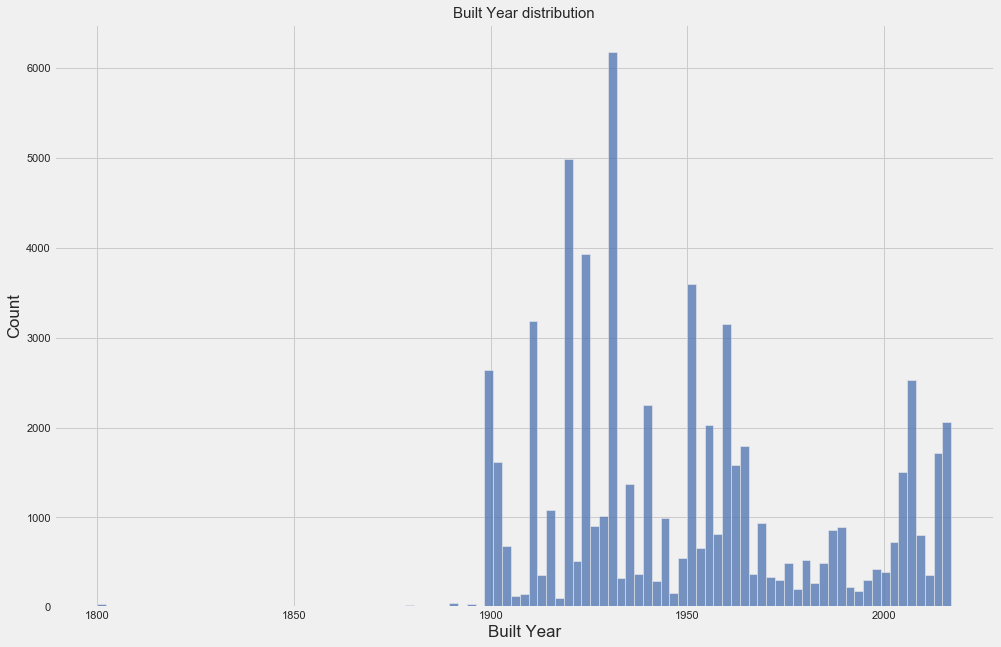

In [33]:
# Figure size and theme
plt.figure(figsize=(15,10))

# Plot the data
sns.histplot(year_dist['YEAR BUILT'])

plt.title('Built Year distribution',fontsize=15)
plt.xlabel('Built Year')
plt.show()

#### **Most appeared Building Class Categories**
It seems that the most properties in New York City are one family dwelllings.

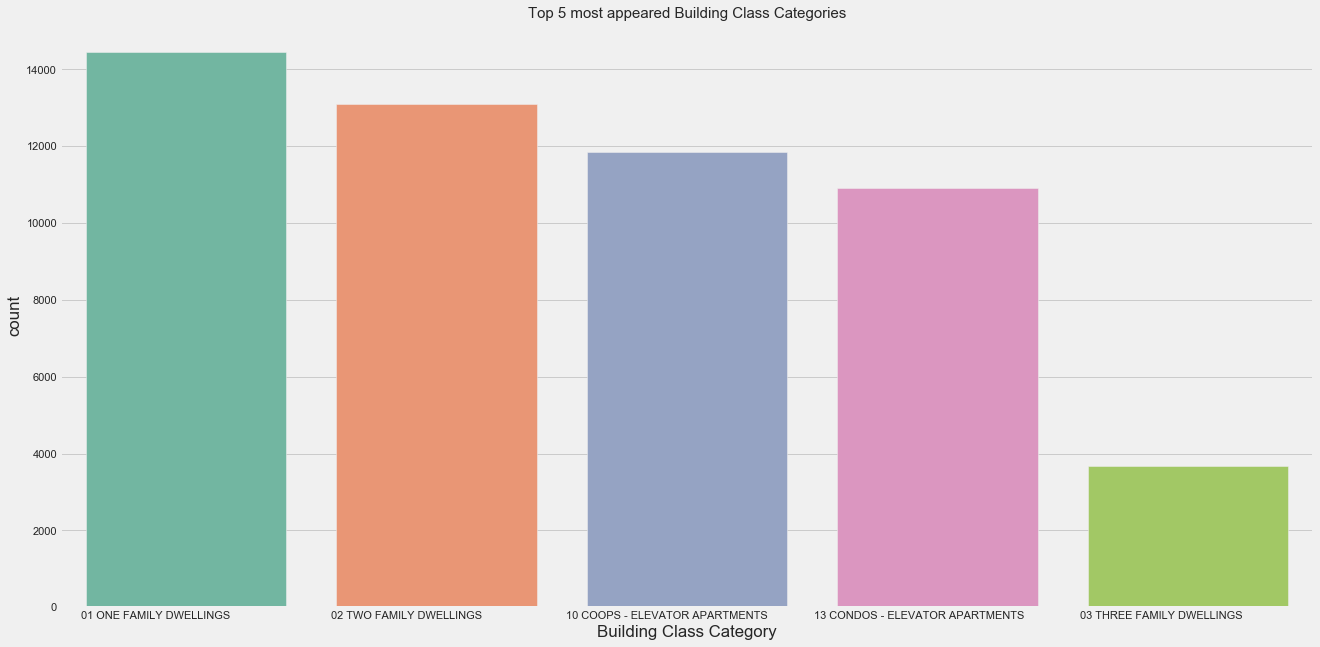

In [34]:
# Figure size and theme
plt.figure(figsize=(20,10))

# Plot the data
sns.countplot(real_estate['BUILDING CLASS CATEGORY'], palette="Set2",
              order=real_estate['BUILDING CLASS CATEGORY'].value_counts().iloc[:5].index)

plt.title('Top 5 most appeared Building Class Categories',fontsize=15)
plt.xlabel('Building Class Category')
plt.show()

## **5. Bivariate Analysis**
Bivariate analysis is one of the simplest forms of quantitative (statistical) analysis. It involves the analysis of two variables (often denoted as X, Y), for the purpose of determining the empirical relationship between them. Bivariate analysis can be helpful in testing simple hypotheses of association.
I'm using it on both datasets to find interesting relastionships.

#### **Overview Sale Date vs Sale Price by Borough**
For this part, I used the subset from a previous section where I exclude some outliers so that this visualization is better to read. It seems that in 2016 the most expensive properties were sold per borough. Also, in 2016 the boroughs of Manhattan, Brooklyn and State Island sold in that year the most expensive properties compared to 2017 where Queens and the Bronx sold more expensive properties.

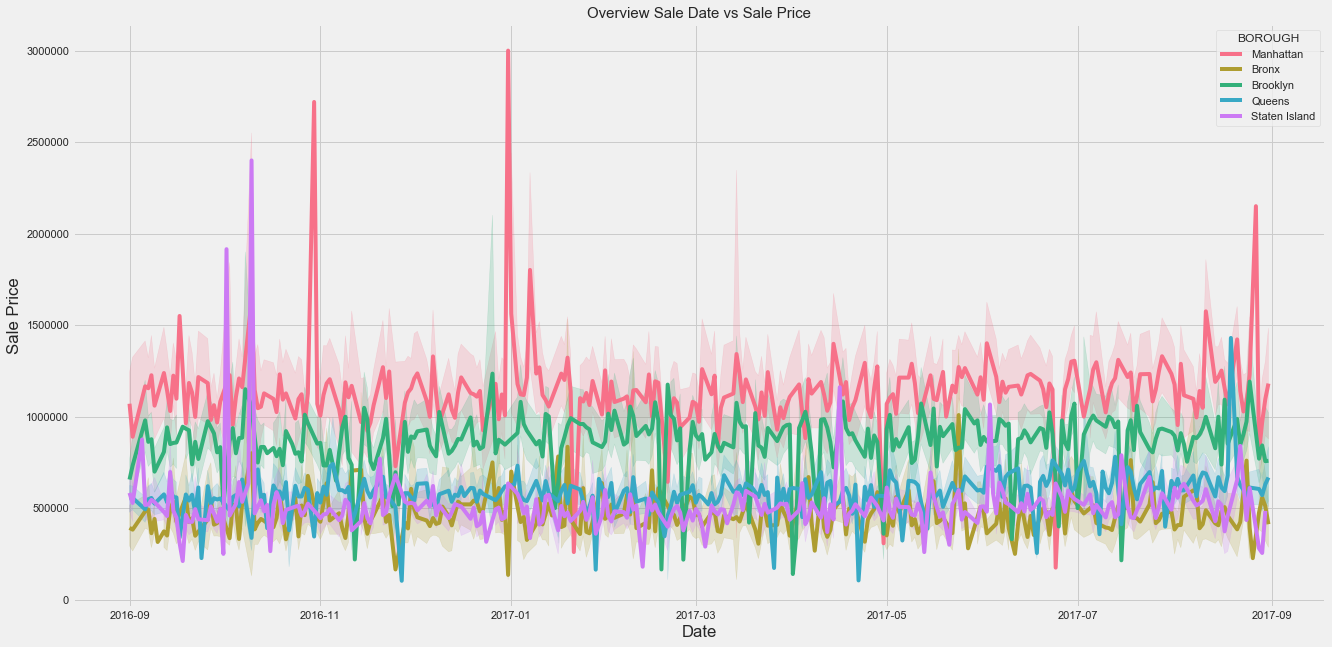

In [35]:
# Figure size and theme
plt.figure(figsize=(20,10))

# Plot the data
sns.lineplot(price_dist['SALE DATE'], price_dist['SALE PRICE'], hue=price_dist['BOROUGH'], palette='husl')

plt.ticklabel_format(style='plain', axis='y')
plt.title('Overview Sale Date vs Sale Price',fontsize=15)
plt.xlabel('Date')
plt.ylabel('Sale Price')
plt.show()

In [36]:
price_dist['YEAR'] = price_dist['SALE DATE'].dt.year

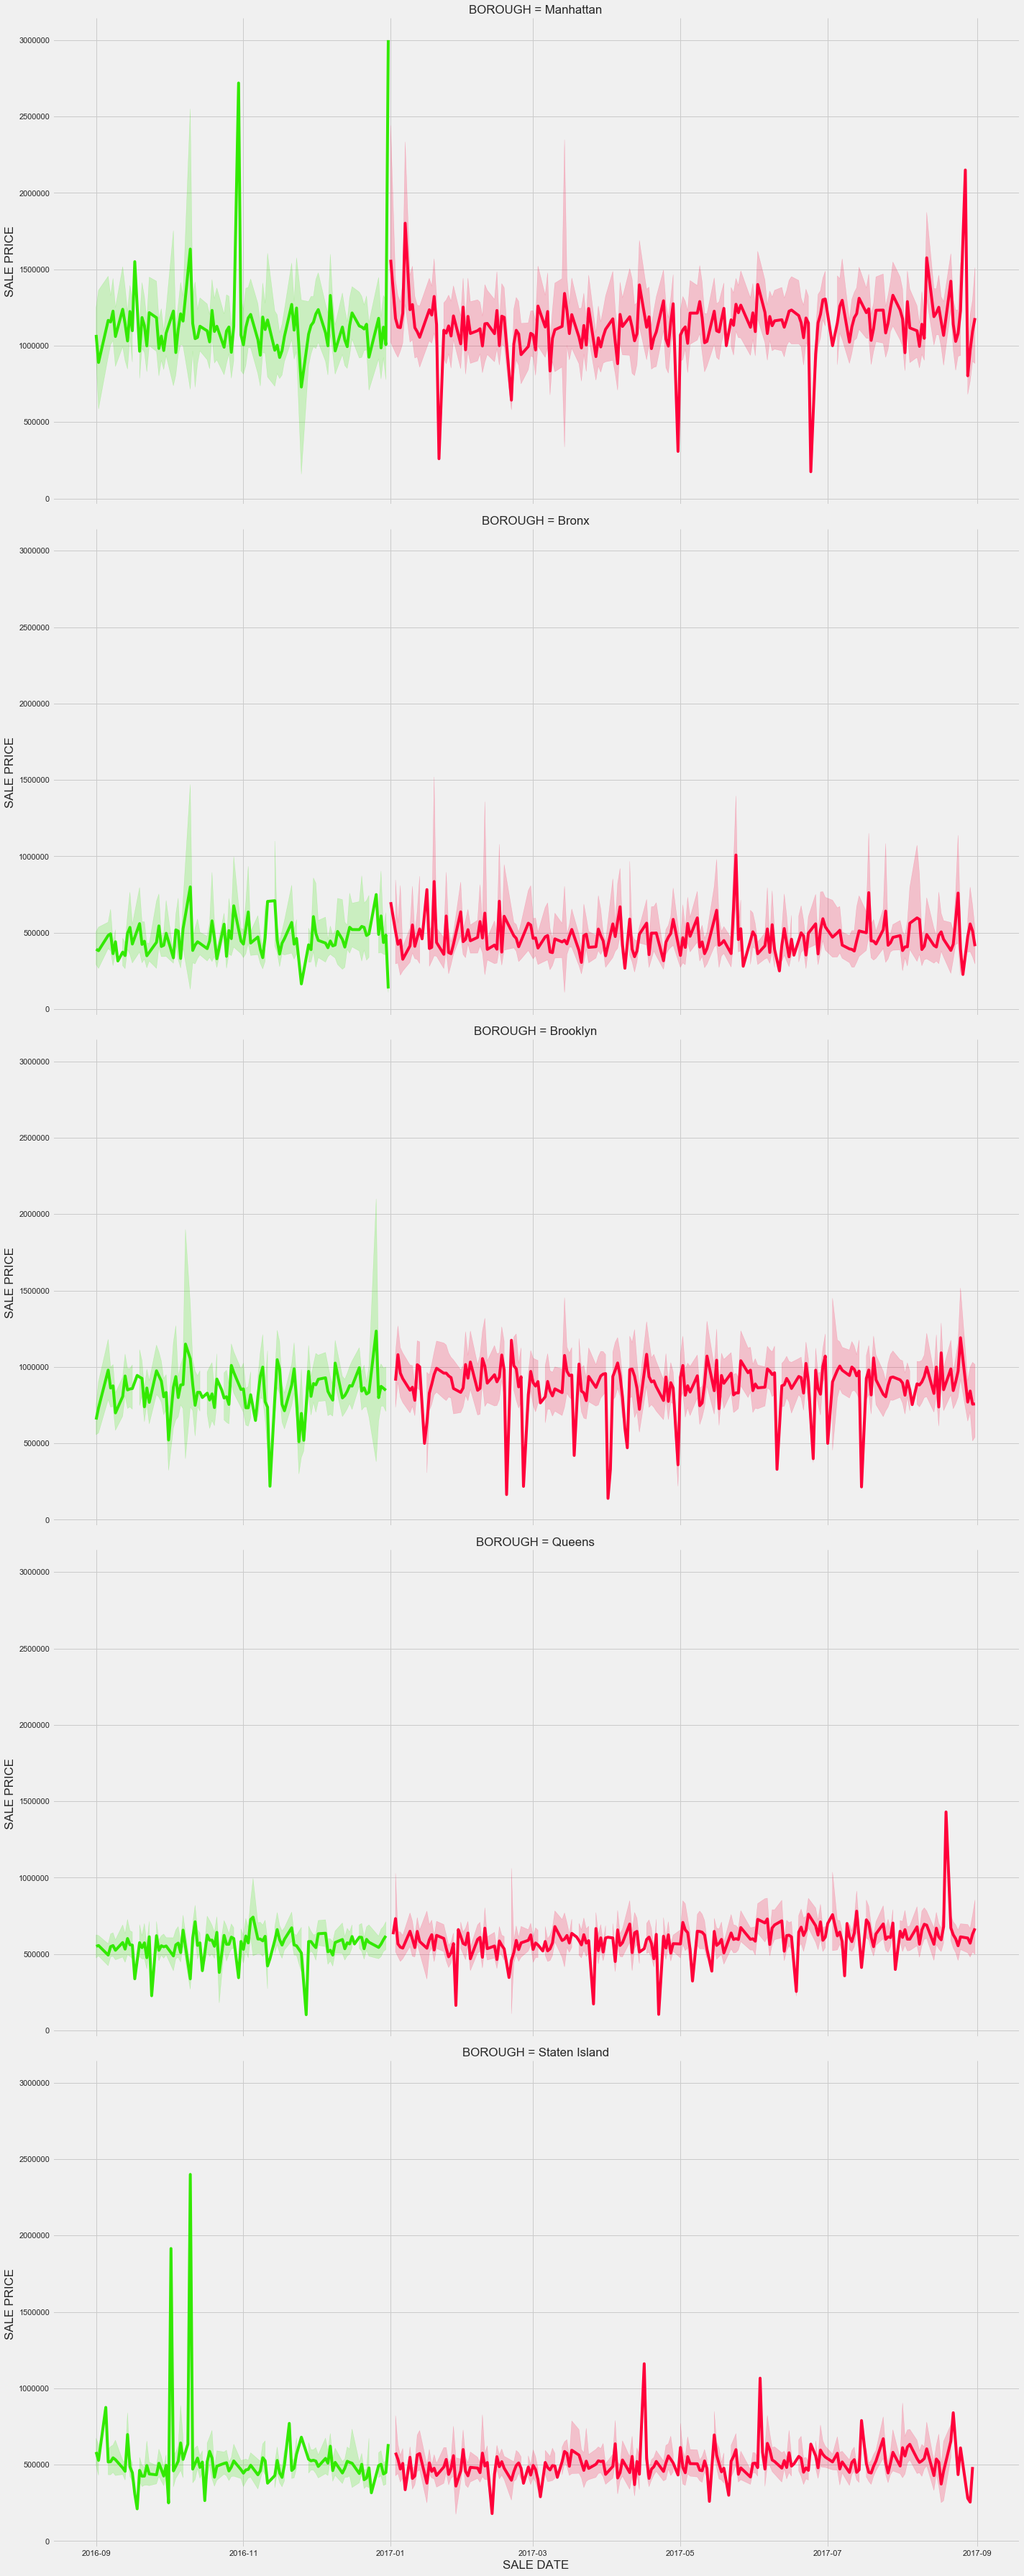

In [37]:
g = sns.FacetGrid(price_dist, row='BOROUGH',height=10,aspect=2, hue='YEAR',palette='prism')
g.map(sns.lineplot, 'SALE DATE', 'SALE PRICE')
plt.ticklabel_format(style='plain', axis='y')

#### **Distribution Sale Price per Borough**
For this part I used the same subset of the data as in the previous section.

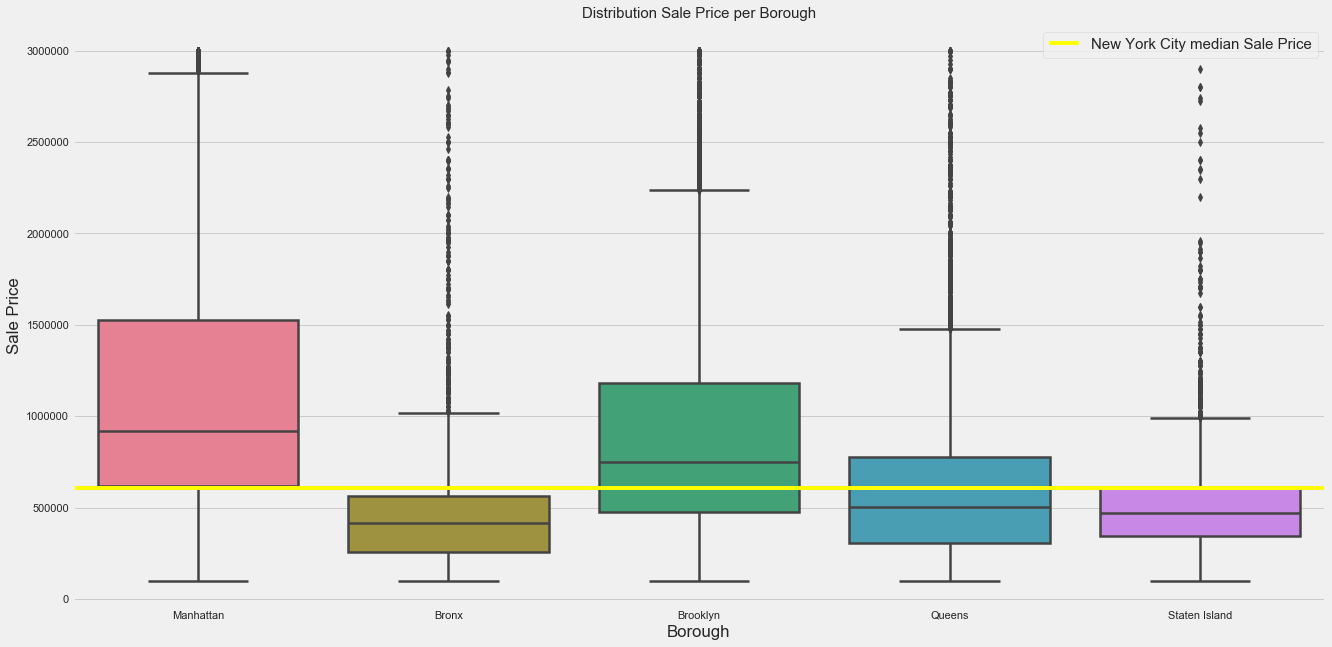

In [38]:
# Figure size and theme
plt.figure(figsize=(20,10))

sns.boxplot(price_dist['BOROUGH'], price_dist['SALE PRICE'], palette='husl', linewidth=2.5)
plt.ticklabel_format(style='plain', axis='y')

plt.title('Distribution Sale Price per Borough',fontsize=15)
plt.xlabel('Borough')
plt.ylabel('Sale Price')
plt.axhline(y=price_dist['SALE PRICE'].median(), color='yellow', label='New York City median Sale Price', linestyle='-')
plt.legend(loc="upper right",prop={'size': 15})
plt.show()

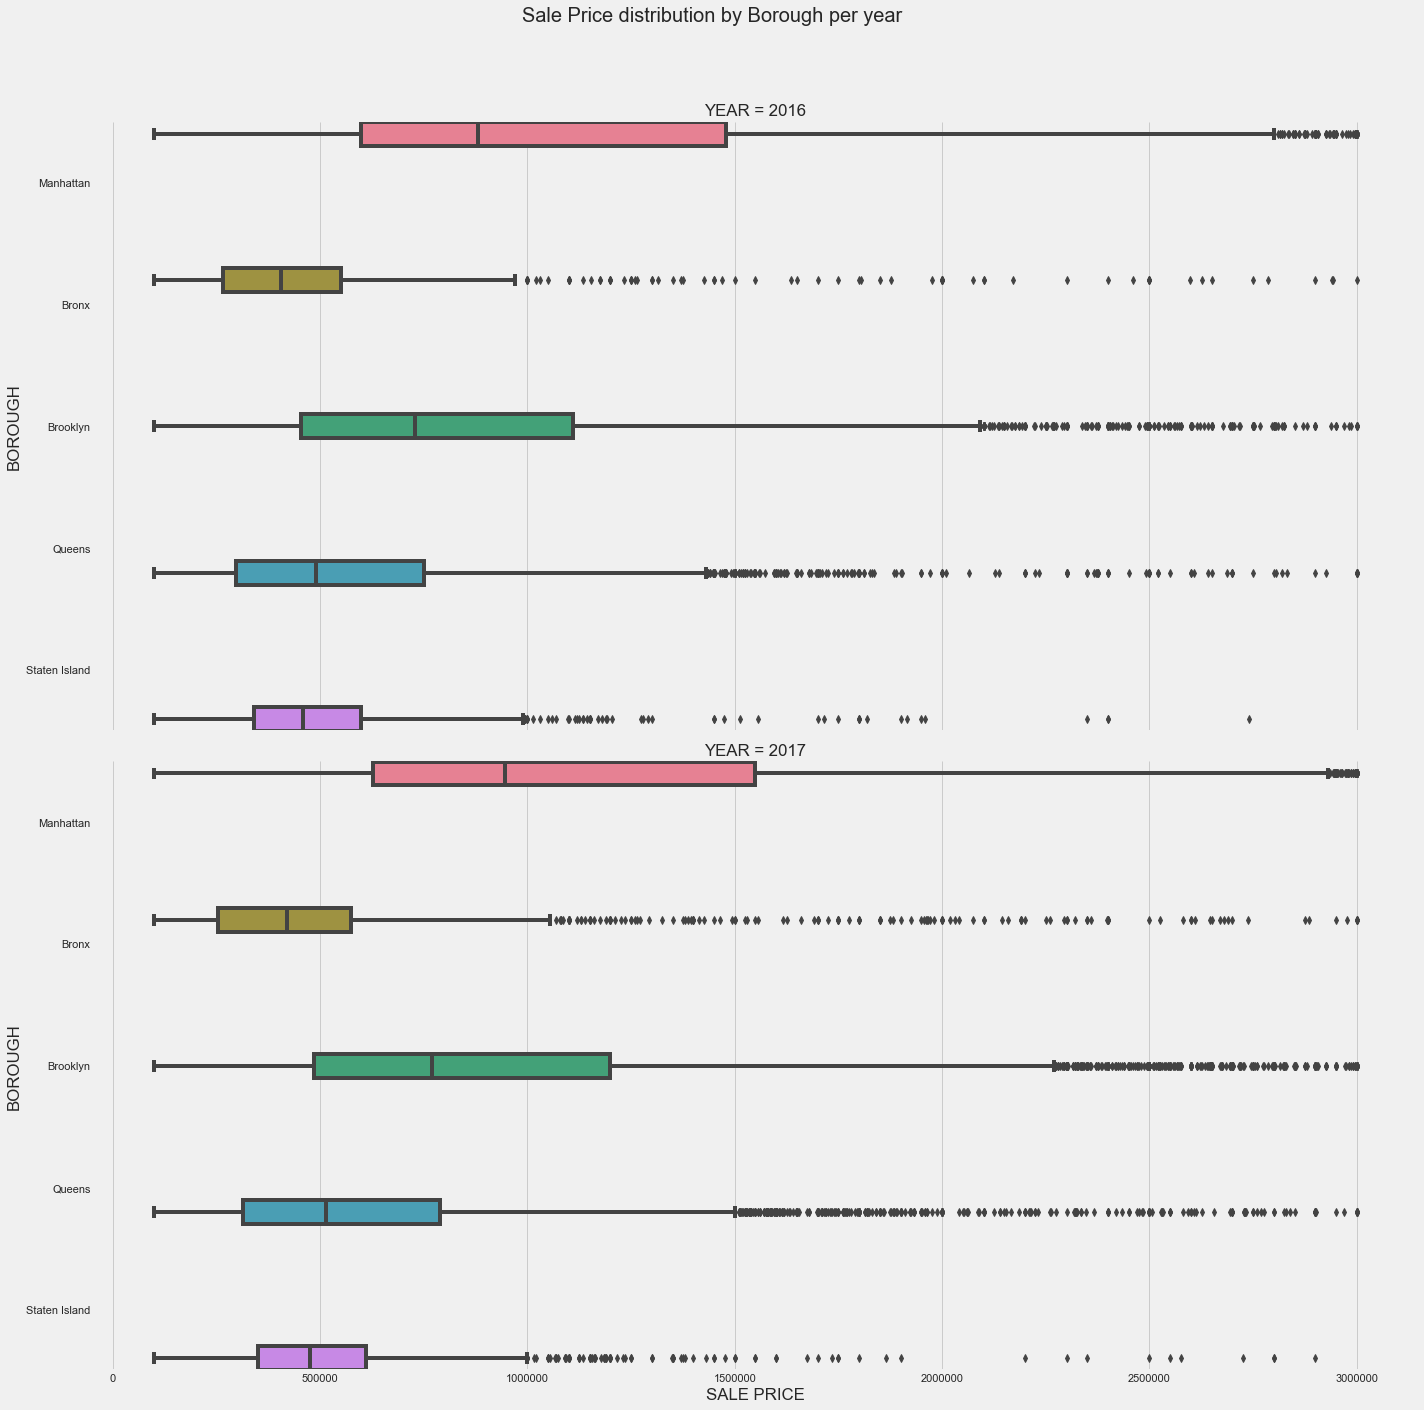

In [39]:
g = sns.FacetGrid(price_dist, row='YEAR',height=10,aspect=2)
plt.ticklabel_format(style='plain', axis='x')
g.map_dataframe(sns.boxplot,'SALE PRICE', 'BOROUGH',hue='BOROUGH', palette='husl',width=1)

g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Sale Price distribution by Borough per year', fontsize=20)

plt.show()

#### **Distribution Sale Price by Building Class Category**
From all the building class categories there can be concluded that there are big differences in the median price per building class category. 08 Rentals Elevator Apartments and 38 Asylums and Homes have the highest median property price from all the properties.

I also made the same plot for every Borough in New York City. Manhatten has overall the highest property prices of all the Boroughs.

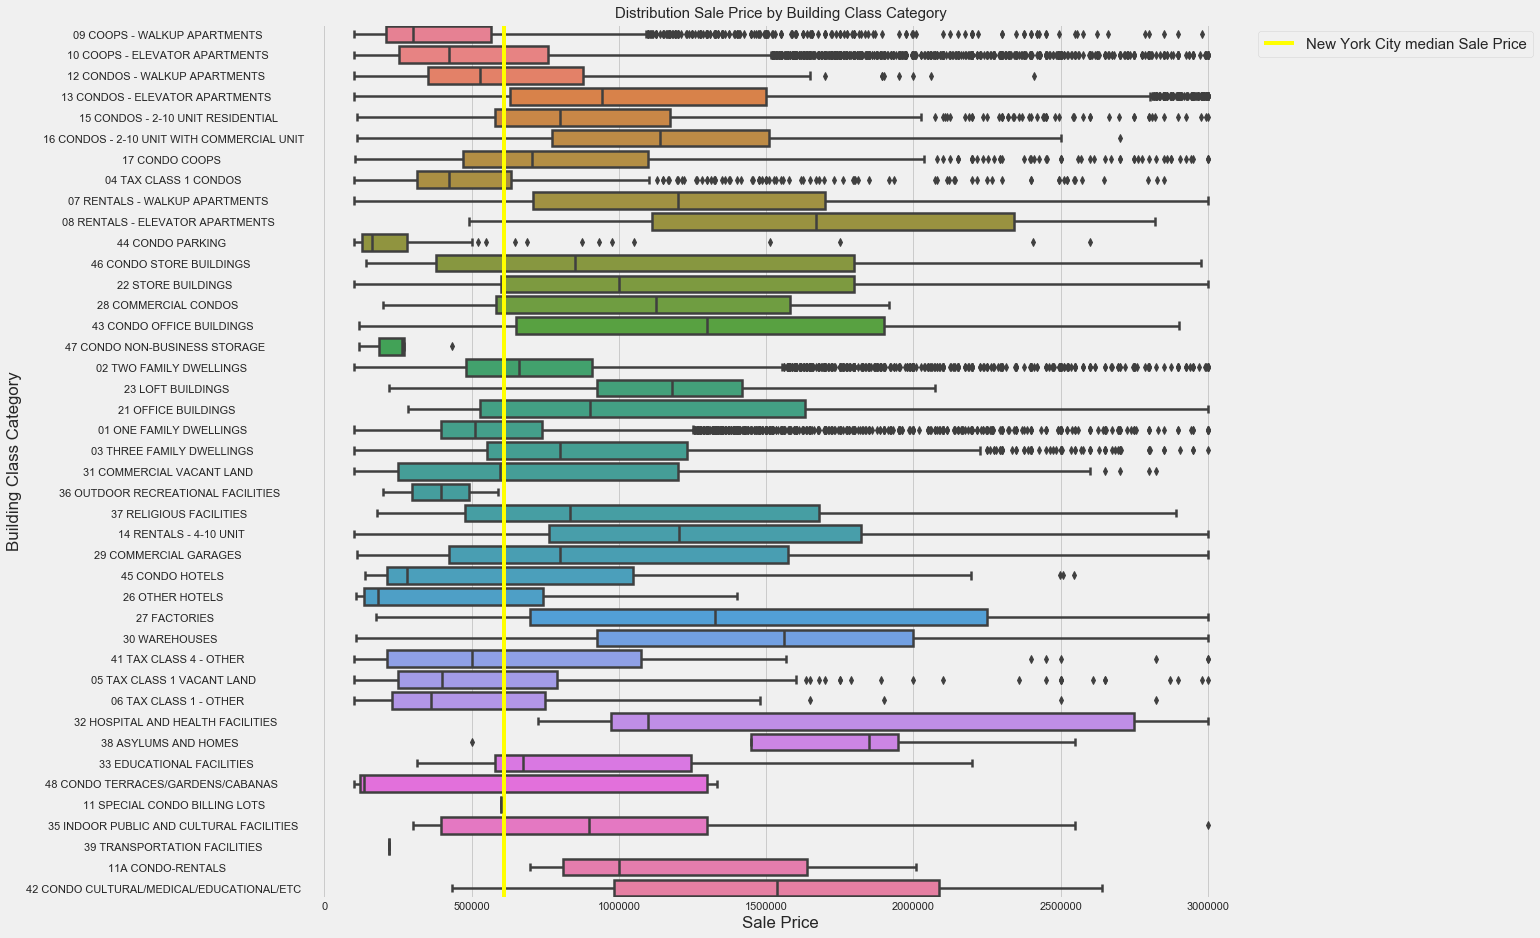

In [40]:
# Figure size and theme
plt.figure(figsize=(15,15))

sns.boxplot(price_dist['SALE PRICE'], price_dist['BUILDING CLASS CATEGORY'],palette='husl', linewidth=2.5, orient='h')
#plt.ticklabel_format(style='plain', axis='y')

plt.title('Distribution Sale Price by Building Class Category',fontsize=15)
plt.xlabel('Sale Price')
plt.ylabel('Building Class Category')
plt.ticklabel_format(style='plain', axis='x')
plt.axvline(x=price_dist['SALE PRICE'].median(), color='yellow', label='New York City median Sale Price', linestyle='-')
plt.legend(loc="upper left",prop={'size': 15},bbox_to_anchor=(1, 1))
plt.show()

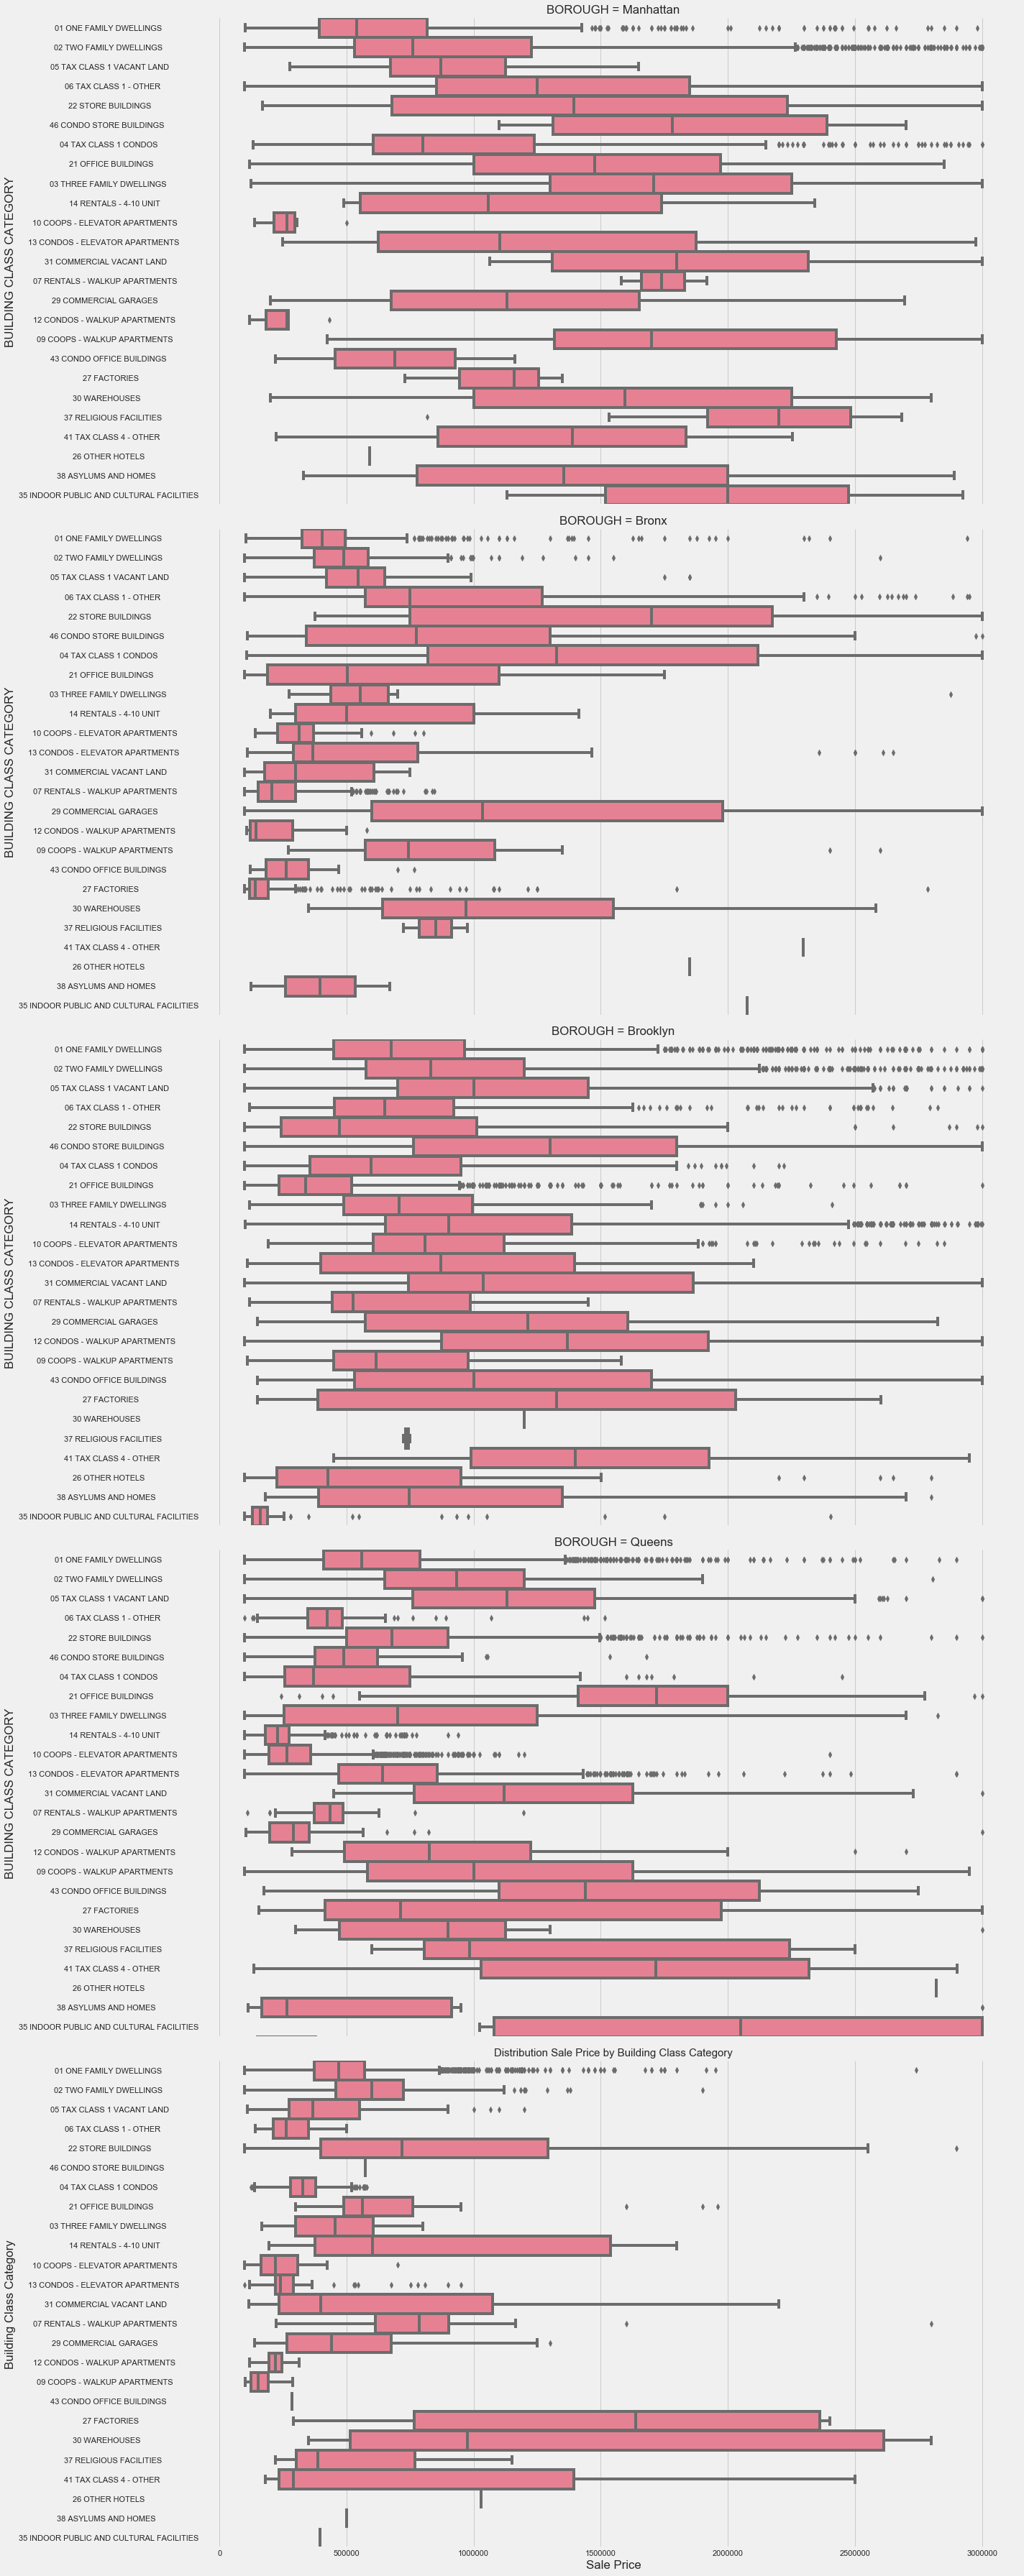

In [41]:
# Figure size and theme
g2 = sns.FacetGrid(price_dist, row='BOROUGH',height=10,aspect=2)

g2.map_dataframe(sns.boxplot,'SALE PRICE','BUILDING CLASS CATEGORY',hue='BOROUGH', palette='husl',width=1)

#plt.ticklabel_format(style='plain', axis='y')

plt.title('Distribution Sale Price by Building Class Category',fontsize=15)
plt.xlabel('Sale Price')
plt.ylabel('Building Class Category')
plt.ticklabel_format(style='plain', axis='x')
plt.show()

#### **Gross Square Feet vs Sale Price**
What you can see in the first splot is that every borough has some outliers that have high gross square feet while most of the data is located on the left. Most data points have gross square feet lower than 5000 with a big difference in the given price range from 100.000 to 3.000.000 dollar. In the second plot, I'm showing a regression plot for every borough in NYC. It seems that Queens has the most linear line of all the boroughs.

In [42]:
gsf = price_dist[(price_dist['GROSS SQUARE FEET']> 0) & (price_dist['GROSS SQUARE FEET']< 20000)]

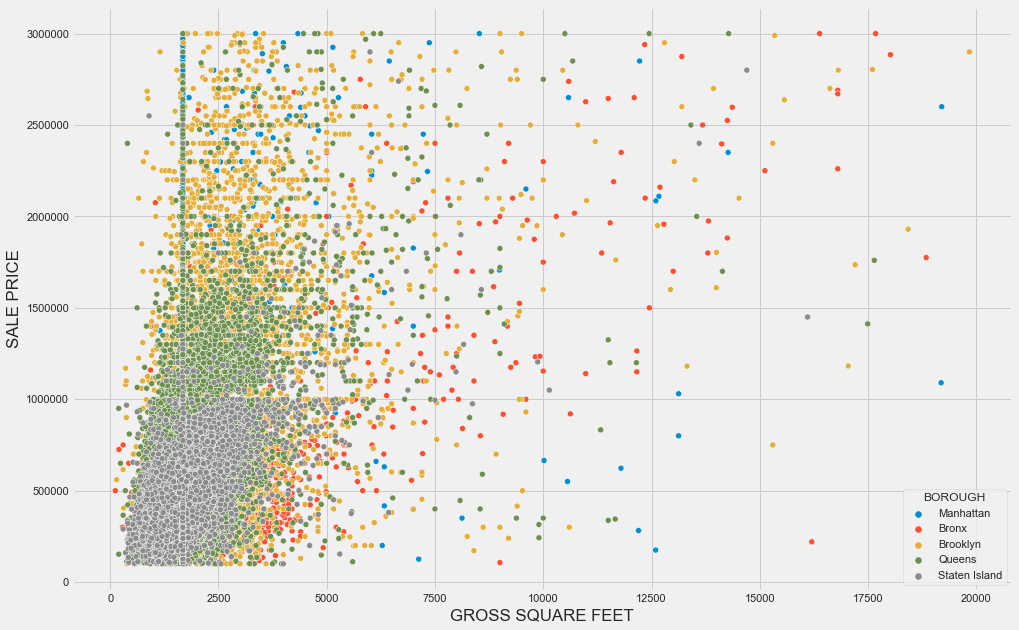

In [43]:
plt.figure(figsize=(15,10))

sns.scatterplot(gsf['GROSS SQUARE FEET'], gsf['SALE PRICE'], hue=gsf['BOROUGH'])
plt.ticklabel_format(style='plain', axis='x')
plt.ticklabel_format(style='plain', axis='y')

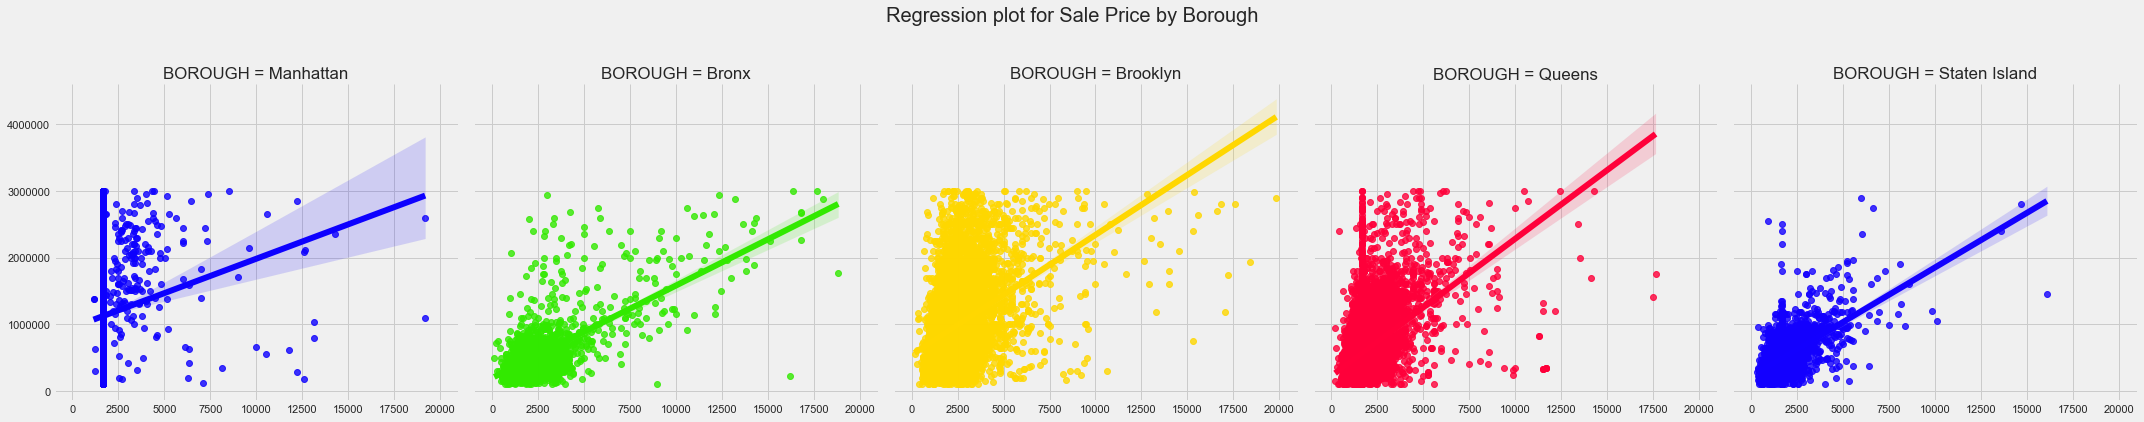

In [44]:
# Plot the data
g2 = sns.FacetGrid(gsf, col='BOROUGH',height=6, hue="BOROUGH", palette='prism',)
g2.map_dataframe(sns.regplot, x='GROSS SQUARE FEET', y='SALE PRICE')

plt.ticklabel_format(style='plain', axis='y')
g2.fig.subplots_adjust(top=0.8)
g2.fig.suptitle('Regression plot for Sale Price by Borough', fontsize=20)

plt.show()

## **6. Correlation matrix**
For the last part, I'm going to take a look at the correlation between the numerical values in my data. This correlation graph shows the correlation coefficients that measures how strong a relationship between two variables is. It seems that there are also variables that have a low correlation, for example, lot(unique identifier) and year built because an ID has nothing to do with the built year. Looking at the stronger correlations, there is a very interesting thing to see. It seems that some of the unit columns have a higher correlation with land square & gross square feet than the other unit columns.

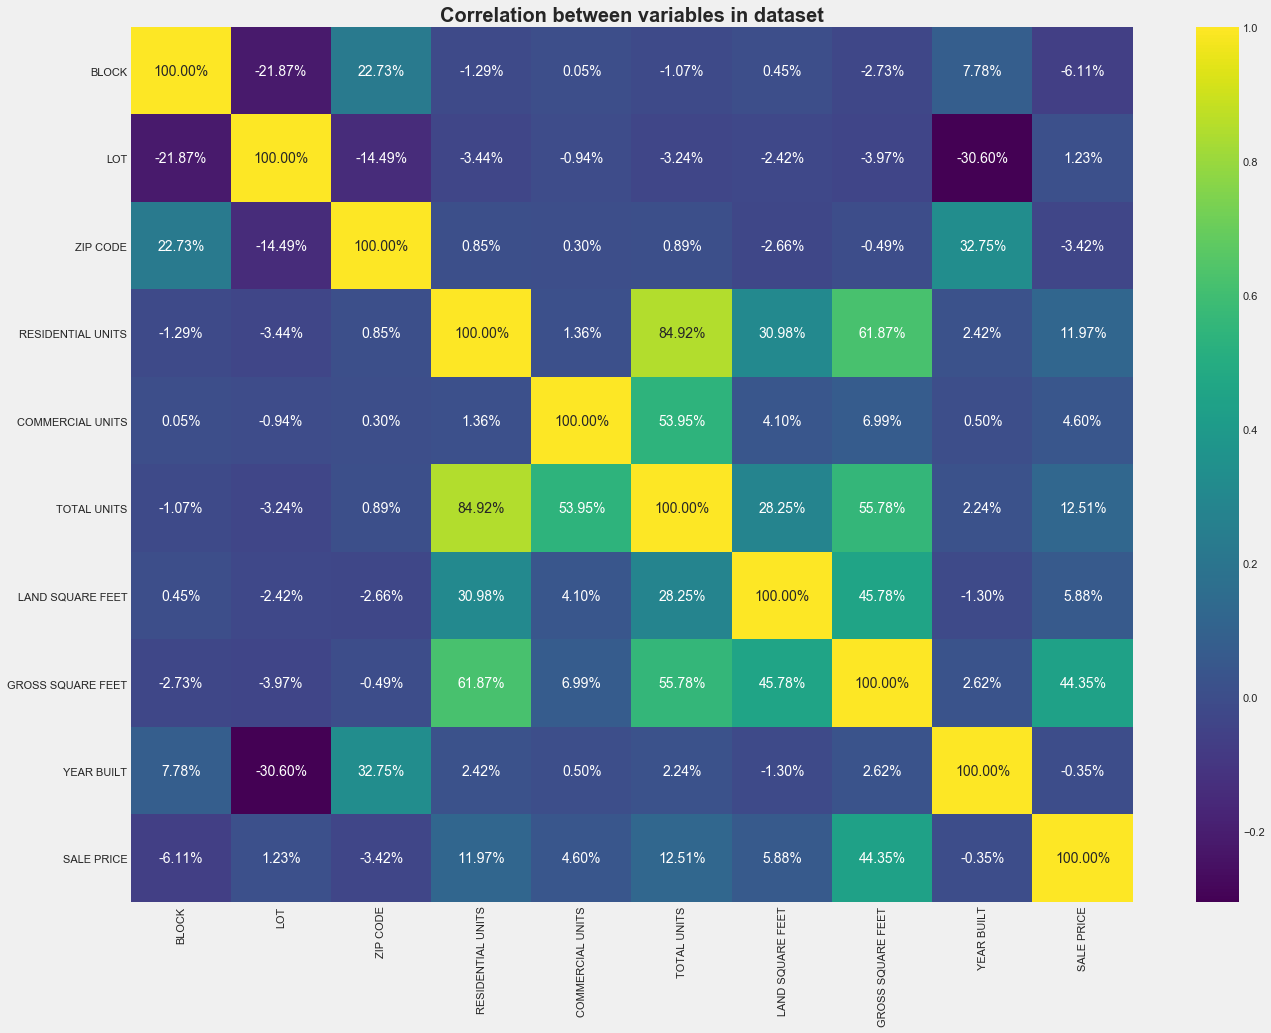

In [45]:
fig = plt.subplots(figsize=(20,15))
ax = sns.heatmap(real_estate.corr(),cmap = "viridis" ,annot=True,fmt=".2%") # Creating a heatmap, display correlation in percentages
ax.tick_params(left=False, bottom=False) # Removing the ticks at the axis
ax.set_title('Correlation between variables in dataset',weight= 'bold',fontsize=20)
plt.show()

## **7. Conclusion**
What I discovered during this EDA is that there are a lot of outliers and missing values in this data. The numerical values like sale price, land square feet and gross square feet have lots of missing values and it was a really good practice to learn how to deal with them. In my next document where I'm going to prepare my data for machine learning, I'm going deeper into data cleaning and how I'm removing outliers. 

During this EDA I discovered more about the different properties in NYC. I knew that there were big price differences between the boroughs in NYC but I learned also more about the characteristics of a property and if that could lead to a higher price. Now that I have a better understanding of this data, I'm going to my next document where I'm preparing the data before it will be used modelling.